# Assignment 3
---
Samarth Kumar

#### README:
Required Depdencies:
* Numpy
* Pandas
* Matplotlib
* Gensim
* Scikit-learn
* Seaborn
* nltk
* PyTorch (2.6.0)
* Cuda (11.8)

The above are for Python 3.11.4.

For the final question involving the Seq2Seq, I ran locally using the above dependency versions, 
including Cuda for my computer's GPU (Nvidia GeForce RTX4060ti).

Make sure your python version is 3.11.4 and install the depdencies according to that version. Use Google Colab's GPU's unless using a local computer with access to a GPU. 

Run the coding blocks in chronological order.

## Problem 1 Part 1: Word Embeddings

In [1]:
%pip install --upgrade numpy
%pip install gensim

  Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
tensorflow-cpu 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import gensim.downloader as api
from gensim.models import FastText
from gensim.test.utils import common_texts
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Similarity Matrix for the Glove-twitter-50D

In [40]:
def similarity_matrix_glove(model, words):
    word_vectors = []
    for word in words:
        try:
            word_vectors.append(model[word.lower()])
        except KeyError:
            print(f"Warning: '{word}' not found in Glove vocabulary")
            word_vectors.append(np.zeros(50)) 
    
    word_vectors = np.array(word_vectors)
    similarity_matrix = cosine_similarity(word_vectors)
    
    return similarity_matrix

Similarity Matrix for FastText

In [4]:
def similarity_matrix_fasttext(model, words):
    word_vectors = []
    for word in words:
        word_vectors.append(model.wv[word.lower()])
    
    word_vectors = np.array(word_vectors)
    similarity_matrix = cosine_similarity(word_vectors)
    
    return similarity_matrix

Function to display the matrices, using a Pandas dataframe

In [5]:
def display_similarity_matrix(matrix, words, title):
    df = pd.DataFrame(matrix, index=words, columns=words)
    print(f"\n{title}:")
    print(df.round(4))

#### a) Glove-Twitter-50D Matrix

In [6]:
words = ['Dog', 'Bark', 'Tree', 'Bank', 'River', 'Money']
glove_model = api.load('glove-twitter-50')
glove_similarity = similarity_matrix_glove(glove_model, words)
display_similarity_matrix(glove_similarity, words, "Glove-twitter-50D Cosine Similarities")


Glove-twitter-50D Cosine Similarities:
          Dog    Bark    Tree    Bank   River   Money
Dog    1.0000  0.5938  0.7138  0.3482  0.4012  0.5751
Bark   0.5938  1.0000  0.5459  0.0401  0.2666  0.2910
Tree   0.7138  0.5459  1.0000  0.3495  0.4871  0.5101
Bank   0.3482  0.0401  0.3495  1.0000  0.3199  0.6747
River  0.4012  0.2666  0.4871  0.3199  1.0000  0.3378
Money  0.5751  0.2910  0.5101  0.6747  0.3378  1.0000


#### b) FastText Matrix

In [7]:
fasttext_model = FastText(vector_size=50, window=5, min_count=1, sentences=common_texts, epochs=10)
fasttext_similarity = similarity_matrix_fasttext(fasttext_model, words)
display_similarity_matrix(fasttext_similarity, words, "FastText Cosine Similarities")


FastText Cosine Similarities:
          Dog    Bark    Tree    Bank   River   Money
Dog    1.0000  0.1078 -0.1700  0.0313 -0.0135 -0.1112
Bark   0.1078  1.0000  0.2076  0.1696  0.0867 -0.0468
Tree  -0.1700  0.2076  1.0000  0.0357  0.0653 -0.2631
Bank   0.0313  0.1696  0.0357  1.0000  0.2033 -0.0164
River -0.0135  0.0867  0.0653  0.2033  1.0000 -0.1227
Money -0.1112 -0.0468 -0.2631 -0.0164 -0.1227  1.0000


#### c) Compare the results from (a) and (b)

In [41]:
print("\nCompare a few specific word relationship pairs:")
print("- Bank-Money relationship:")
glove_bank_money = glove_similarity[words.index('Bank')][words.index('Money')]
fasttext_bank_money = fasttext_similarity[words.index('Bank')][words.index('Money')]
print(f"  Glove: {glove_bank_money:.4f}, FastText: {fasttext_bank_money:.4f}")
    
print("- Dog-Bark relationship:")
glove_dog_bark = glove_similarity[words.index('Dog')][words.index('Bark')]
fasttext_dog_bark = fasttext_similarity[words.index('Dog')][words.index('Bark')]
print(f"  Glove: {glove_dog_bark:.4f}, FastText: {fasttext_dog_bark:.4f}")


Compare a few specific word relationship pairs:
- Bank-Money relationship:
  Glove: 0.6747, FastText: -0.0164
- Dog-Bark relationship:
  Glove: 0.5938, FastText: 0.1078


To determine which embedding captured better semantics, I first printed the cosine similarity matrices for both. I immediately noticed that the FastText matrix had more negative values, which was already a sign of poor performance.

To compare the magnitudes of both matrices, I focused on a few individual word pairings and printed them separately. I used the following pairs: Bank-Money and Dog-Bark. The results are printed above. The magnitudes for both pairs are higher and positive for Glove.

Therefore the Glove word2vec embedding captured better semantics than FastText.

## Problem 1 Part 2: N-grams and Classification

In [9]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [10]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Load the Twitter data from nltk

In [11]:
def download_twitter_data():
    nltk.download('twitter_samples')
    nltk.download('punkt')
    positive_tweets = nltk.corpus.twitter_samples.strings('positive_tweets.json')
    negative_tweets = nltk.corpus.twitter_samples.strings('negative_tweets.json')
    tweets = positive_tweets + negative_tweets
    labels = [1] * len(positive_tweets) + [0] * len(negative_tweets)
    return tweets, labels

#### a) Split the data 70% training and 30% testing.

In [12]:
tweets, labels = download_twitter_data()
X_train, X_test, y_train, y_test = train_test_split(
    tweets, labels, 
    test_size=0.3, 
    random_state=42, 
    stratify=labels
)

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\skuma\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skuma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
print("Training size: ", len(X_train))
print("Testing size: ", len(X_test))

Training size:  7000
Testing size:  3000


#### b) Extract n-grams for n in [1,4]

In [14]:
def extract_ngrams(text, n):
    tokens = word_tokenize(text.lower())
    n_grams = list(ngrams(tokens, n))
    return [' '.join(gram) for gram in n_grams]

#### c) Train and Evaluate Logistic Regression model using n-gram features.

In [15]:
def train(X_train, X_test, y_train, y_test, n):
    # Create vectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X_train_features = vectorizer.fit_transform(X_train)
    X_test_features = vectorizer.transform(X_test)
    
    # Train logistic regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_features, y_train)
    y_pred = model.predict(X_test_features)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report, len(vectorizer.get_feature_names_out())

In [16]:
accuracies = []
feature_counts = []

n = 1

In [17]:
print(f"\nTraining model with {1}-grams")
accuracy, report, feature_count = train(
    X_train, X_test, y_train, y_test, 1
)
accuracies.append(accuracy)
feature_counts.append(feature_count)
        
print(f"\n{1}-gram Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"Number of features: {feature_count}")


Training model with 1-grams

1-gram Model Performance:
Accuracy: 0.7647
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1500
           1       0.77      0.75      0.76      1500

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000

Number of features: 15774


n = 2

In [18]:
print(f"\nTraining model with {2}-grams")
accuracy, report, feature_count = train(
    X_train, X_test, y_train, y_test, 2
)
accuracies.append(accuracy)
feature_counts.append(feature_count)
        
print(f"\n{2}-gram Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"Number of features: {feature_count}")


Training model with 2-grams

2-gram Model Performance:
Accuracy: 0.6987
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1500
           1       0.76      0.58      0.66      1500

    accuracy                           0.70      3000
   macro avg       0.71      0.70      0.69      3000
weighted avg       0.71      0.70      0.69      3000

Number of features: 43131


n = 3

In [19]:
print(f"\nTraining model with {3}-grams")
accuracy, report, feature_count = train(
    X_train, X_test, y_train, y_test, 3
)
accuracies.append(accuracy)
feature_counts.append(feature_count)
        
print(f"\n{3}-gram Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"Number of features: {feature_count}")


Training model with 3-grams

3-gram Model Performance:
Accuracy: 0.6137
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.94      0.71      1500
           1       0.82      0.29      0.43      1500

    accuracy                           0.61      3000
   macro avg       0.70      0.61      0.57      3000
weighted avg       0.70      0.61      0.57      3000

Number of features: 51263


n = 4

In [20]:
print(f"\nTraining model with {4}-grams")
accuracy, report, feature_count = train(
    X_train, X_test, y_train, y_test, 4
)
accuracies.append(accuracy)
feature_counts.append(feature_count)
        
print(f"\n{4}-gram Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"Number of features: {feature_count}")


Training model with 4-grams

4-gram Model Performance:
Accuracy: 0.5700
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.99      0.70      1500
           1       0.92      0.15      0.26      1500

    accuracy                           0.57      3000
   macro avg       0.73      0.57      0.48      3000
weighted avg       0.73      0.57      0.48      3000

Number of features: 47613


#### d) Compare the performances using different values of n in n-grams

In [21]:
def plot_performance(accuracies, feature_counts):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracies
    ax1.plot(range(1, 5), accuracies, marker='o')
    ax1.set_xlabel('n-gram size')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Model Accuracy vs n-gram size')
    ax1.grid(True)
    
    # Plot feature counts
    ax2.bar(range(1, 5), feature_counts)
    ax2.set_xlabel('n-gram size')
    ax2.set_ylabel('Number of Features')
    ax2.set_title('Number of Features vs n-gram size')
    
    plt.tight_layout()
    plt.savefig('ngram_analysis.png')
    plt.show()

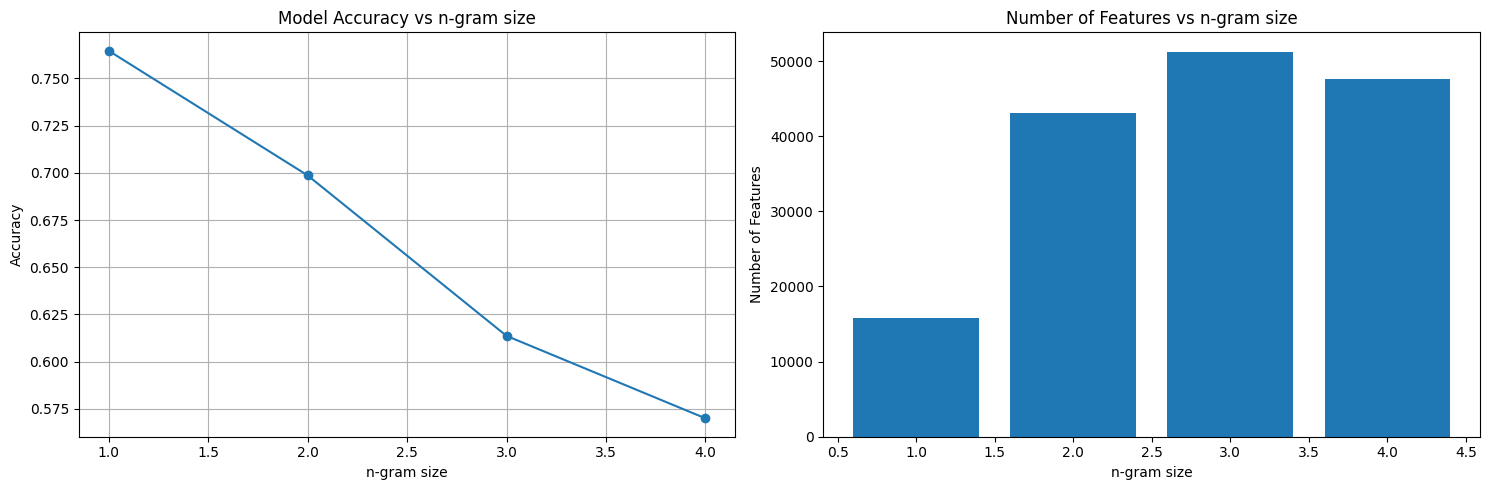


N-gram effect on model performance:
1. Accuracy trends:
   1-gram: 0.7647
   2-gram: 0.6987
   3-gram: 0.6137
   4-gram: 0.5700

2. Feature space size:
   1-gram: 15774 features
   2-gram: 43131 features
   3-gram: 51263 features
   4-gram: 47613 features


In [43]:
# Plot the feature counts and accuracies
plot_performance(accuracies, feature_counts)
    
print("\nN-gram effect on model performance:")
print("1. Accuracy trends:")
for n, acc in enumerate(accuracies, 1):
    print(f"   {n}-gram: {acc:.4f}")
    
print("\n2. Feature space size:")
for n, count in enumerate(feature_counts, 1):
    print(f"   {n}-gram: {count} features")

As you can see, the number of features increases as the n value in n-gram increases. The highest feature space size was 51,263 for n = 3. The feature space size for n = 2, 3, 4 is significantly larger than when n = 1.

However, the accuracy ends up decreasing for higher values of n. The accuracy of 0.7647 was the highest, where n = 1, and the lowest accuracy was 0.5700 where n = 4.

## Problem 2: RNN and Machine Translation

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from datasets import load_dataset
import evaluate
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\skuma\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load data, tokenize, build vocabulary

In [24]:
def build_vocab(texts, min_freq=2):
    counter = Counter()
    for line in texts:
        counter.update(line.lower().split())
    # Reserve special tokens
    vocab = {'<pad>': 0, '<unk>': 1, '<start>': 2, '<end>': 3}
    idx = 4
    for word, freq in counter.items():
        if freq >= min_freq and word not in vocab:
            vocab[word] = idx
            idx += 1
    return vocab

def tokenize(texts, vocab, max_len):
    sequences = []
    for line in texts:
        tokens = line.lower().split()
        # Leave space for <start> and <end>
        truncated = tokens[: max_len - 2]
        token_ids = [vocab['<start>']] + [vocab.get(t, vocab['<unk>']) for t in truncated] + [vocab['<end>']]
        sequences.append(torch.tensor(token_ids, dtype=torch.long))
    return sequences

def collate_fn(batch):
    inputs, targets = zip(*batch)
    inputs = pad_sequence(inputs, batch_first=True, padding_value=0)
    targets = pad_sequence(targets, batch_first=True, padding_value=0)
    return inputs.to(DEVICE), targets.to(DEVICE)

def load_data(input_len, summary_len):
    dataset = load_dataset("billsum", split="ca_test")
    train_test = dataset.train_test_split(test_size=0.2)
    train_data = train_test["train"]
    test_data = train_test["test"]

    train_texts = [t[:input_len] for t in train_data["text"]]
    train_summaries = [s[:summary_len] for s in train_data["summary"]]
    test_texts = [t[:input_len] for t in test_data["text"]]
    test_summaries = [s[:summary_len] for s in test_data["summary"]]

    input_vocab = build_vocab(train_texts + test_texts, min_freq=2)
    summary_vocab = build_vocab(train_summaries + test_summaries, min_freq=2)

    train_input_seq = tokenize(train_texts, input_vocab, input_len)
    train_summary_seq = tokenize(train_summaries, summary_vocab, summary_len)
    test_input_seq = tokenize(test_texts, input_vocab, input_len)
    test_summary_seq = tokenize(test_summaries, summary_vocab, summary_len)

    return train_input_seq, train_summary_seq, test_input_seq, test_summary_seq, input_vocab, summary_vocab

Dataset class

In [25]:
class TextSummaryDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

#### 1) Implement the Seq2Seq model using RNN. 

In [26]:
class Seq2SeqModel(nn.Module):
    def __init__(self, input_vocab_size, output_vocab_size, embedding_dim=256, hidden_dim=512, dropout=0.2):
        super().__init__()
        # Encoder
        self.encoder_embedding = nn.Embedding(input_vocab_size, embedding_dim, padding_idx=0)
        self.encoder_lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        # Decoder
        self.decoder_embedding = nn.Embedding(output_vocab_size, embedding_dim, padding_idx=0)
        self.decoder_lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_vocab_size)
        self.dropout = nn.Dropout(dropout)

    # Forward pass
    def forward(self, src, tgt, teacher_forcing_ratio=0.5):
        batch_size, tgt_len = tgt.size()
        vocab_size = self.fc.out_features
        outputs = torch.zeros(batch_size, tgt_len, vocab_size, device=DEVICE)
        
        encoder_embedded = self.dropout(self.encoder_embedding(src))
        _, (hidden, cell) = self.encoder_lstm(encoder_embedded)

        # First input is always the <start> token
        input_token = tgt[:, 0]
        for t in range(1, tgt_len):
            embedded_t = self.dropout(self.decoder_embedding(input_token).unsqueeze(1))
            dec_output, (hidden, cell) = self.decoder_lstm(embedded_t, (hidden, cell))
            predictions = self.fc(dec_output.squeeze(1))
            outputs[:, t] = predictions

            teacher_force = random.random() < teacher_forcing_ratio
            top1 = predictions.argmax(1)
            input_token = tgt[:, t] if teacher_force else top1

        return outputs

Train and evaluate the model

In [27]:
# Train the model itself
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs=10, teacher_forcing_ratio=0.5):
    model.train()
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        epoch_loss = 0.0
        for src, tgt in train_loader:
            optimizer.zero_grad()
            output = model(src, tgt, teacher_forcing_ratio=teacher_forcing_ratio)
            output_dim = output.shape[-1]
            output = output[:, 1:].reshape(-1, output_dim)
            tgt_out = tgt[:, 1:].reshape(-1)
            loss = criterion(output, tgt_out)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_train_loss = epoch_loss / len(train_loader)
        val_loss = evaluate_model(model, val_loader, criterion)
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")
    return train_losses, val_losses

# Evaluate the model by calculating the loss
def evaluate_model(model, val_loader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for src, tgt in val_loader:
            output = model(src, tgt, teacher_forcing_ratio=0.0)
            output_dim = output.shape[-1]
            output = output[:, 1:].reshape(-1, output_dim)
            tgt_out = tgt[:, 1:].reshape(-1)
            loss = criterion(output, tgt_out)
            total_loss += loss.item()
    model.train()
    return total_loss / len(val_loader)


Decode the tokens

In [28]:
def decode(model, src, summary_vocab, max_len=128):
    model.eval()
    with torch.no_grad():
        embedded_src = model.encoder_embedding(src)
        _, (hidden, cell) = model.encoder_lstm(embedded_src)
        start_token = summary_vocab['<start>']
        end_token = summary_vocab['<end>']
        input_token = torch.tensor([start_token], device=DEVICE).unsqueeze(0)
        decoded_tokens = []
        for _ in range(max_len):
            embedded_t = model.decoder_embedding(input_token)
            dec_output, (hidden, cell) = model.decoder_lstm(embedded_t, (hidden, cell))
            preds = model.fc(dec_output.squeeze(1))
            next_token = preds.argmax(1)
            decoded_tokens.append(next_token.item())
            if next_token.item() == end_token:
                break
            input_token = next_token.unsqueeze(0)
    return decoded_tokens

Calculating the BLEU score

In [29]:
def calculate_bleu(model, test_inputs, test_targets, summary_vocab, limit=50):
    bleu = evaluate.load("bleu")
    rev_summary_vocab = {v: k for k, v in summary_vocab.items()}
    predictions = []
    references = []
    for i in range(min(limit, len(test_inputs))):
        src = test_inputs[i].unsqueeze(0).to(DEVICE)
        tgt_seq = test_targets[i]
        pred_ids = decode(model, src, summary_vocab, max_len=len(tgt_seq))
        pred_tokens = [rev_summary_vocab.get(idx, '<unk>') for idx in pred_ids if idx not in {0,1,2,3}]
        tgt_tokens = [rev_summary_vocab.get(idx.item(), '<unk>') for idx in tgt_seq if idx.item() not in {0,1,2,3}]
        predictions.append(" ".join(pred_tokens))
        references.append([" ".join(tgt_tokens)])
    results = bleu.compute(predictions=predictions, references=references)
    return results["bleu"]

Calculating the accuracy

In [30]:
def calculate_accuracy(model, test_dataset, batch_size=32):
    model.eval()
    dataloader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn)
    total_tokens = 0
    correct_tokens = 0
    with torch.no_grad():
        for src, tgt in dataloader:
            output = model(src, tgt, teacher_forcing_ratio=0.0)
            output_dim = output.shape[-1]
            output = output[:, 1:].reshape(-1, output_dim)
            tgt_out = tgt[:, 1:].reshape(-1)
            preds = output.argmax(dim=-1)
            mask = tgt_out != 0  # ignore padding
            correct_tokens += (preds[mask] == tgt_out[mask]).sum().item()
            total_tokens += mask.sum().item()
    return correct_tokens / total_tokens if total_tokens > 0 else 0

Function to run a single experiment with desired input/summary sequence lengths and hyperparameters.

In [33]:
# Complete the training and evaluation process for a single model.
# This includes preparing the data, training the model, evaluating performance and plotting results.
def train_sequence(
    input_len, summary_len, epochs=5, batch_size=32,
    embedding_dim=256, hidden_dim=512, dropout=0.2,
    teacher_forcing_ratio=0.5, lr=1e-3
):
    print(f"Input length: {input_len}, Summary length: {summary_len}, Epochs: {epochs}, Batch size: {batch_size}")

    train_in, train_sum, test_in, test_sum, in_vocab, sum_vocab = load_data(input_len, summary_len)
    train_dataset = TextSummaryDataset(train_in, train_sum)
    test_dataset = TextSummaryDataset(test_in, test_sum)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


    model = Seq2SeqModel(
        input_vocab_size = len(in_vocab),
        output_vocab_size = len(sum_vocab),
        embedding_dim = embedding_dim,
        hidden_dim = hidden_dim,
        dropout = dropout
    ).to(DEVICE)

    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss(ignore_index=0)

    train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, criterion, 
                                           epochs=epochs, teacher_forcing_ratio=teacher_forcing_ratio)


    plt.figure(figsize=(8,4))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.legend()
    plt.title(f"Loss Curve (Input: {input_len}, Summary: {summary_len})")
    plt.show()

    bleu_score = calculate_bleu(model, test_in, test_sum, sum_vocab, limit=50)
    accuracy = calculate_accuracy(model, test_dataset, batch_size=batch_size)
    print(f"BLEU Score: {bleu_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    return bleu_score, accuracy

#### 2) Using number of neurons, dropout, and selection of RNN architecture.
* embedding_dim = 256
* hidden_dim = 512
* dropout = 0.2
* batch size = 32
* The Seq2Seq model contains LSTM layers in the encoder and decoder.

The next part will show the BLEU scores for varying input sequence lengths. The results will use the same criteria as above, but altering the main and summary text lengths.

#### 3) Testing input sequences of lengths 1024 and 2048, as well as summary sequence lengths of 128 and 256.


===== Testing with Main Text: 1024, Summary Text: 128 =====
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 32
Epoch 1/20: Train Loss: 5.6345, Val Loss: 5.0416
Epoch 2/20: Train Loss: 4.8275, Val Loss: 4.9461
Epoch 3/20: Train Loss: 4.6393, Val Loss: 4.9762
Epoch 4/20: Train Loss: 4.4936, Val Loss: 4.9839
Epoch 5/20: Train Loss: 4.4017, Val Loss: 5.1069
Epoch 6/20: Train Loss: 4.3027, Val Loss: 4.9818
Epoch 7/20: Train Loss: 4.1677, Val Loss: 5.0359
Epoch 8/20: Train Loss: 4.1145, Val Loss: 4.9849
Epoch 9/20: Train Loss: 3.9604, Val Loss: 5.0304
Epoch 10/20: Train Loss: 3.9354, Val Loss: 5.0648
Epoch 11/20: Train Loss: 3.8824, Val Loss: 5.2256
Epoch 12/20: Train Loss: 3.7947, Val Loss: 5.1225
Epoch 13/20: Train Loss: 3.6745, Val Loss: 5.2814
Epoch 14/20: Train Loss: 3.5822, Val Loss: 5.3615
Epoch 15/20: Train Loss: 3.4953, Val Loss: 5.9414
Epoch 16/20: Train Loss: 3.3746, Val Loss: 5.4700
Epoch 17/20: Train Loss: 3.2983, Val Loss: 5.4027
Epoch 18/20: Train Loss: 3.325

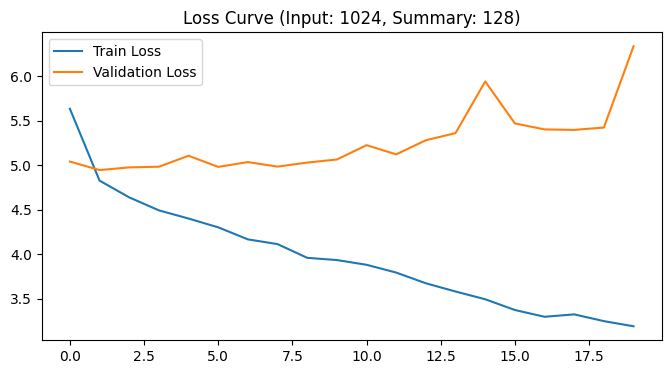

BLEU Score: 0.0352
Accuracy: 0.1267

===== Testing with Main Text: 1024, Summary Text: 256 =====
Input length: 1024, Summary length: 256, Epochs: 20, Batch size: 32
Epoch 1/20: Train Loss: 6.2634, Val Loss: 5.7965
Epoch 2/20: Train Loss: 5.5466, Val Loss: 5.6803
Epoch 3/20: Train Loss: 5.3620, Val Loss: 5.6897
Epoch 4/20: Train Loss: 5.2539, Val Loss: 5.6839
Epoch 5/20: Train Loss: 5.1121, Val Loss: 5.6870
Epoch 6/20: Train Loss: 5.0280, Val Loss: 5.7554
Epoch 7/20: Train Loss: 4.9179, Val Loss: 5.7486
Epoch 8/20: Train Loss: 4.8276, Val Loss: 5.7826
Epoch 9/20: Train Loss: 4.7167, Val Loss: 5.7431
Epoch 10/20: Train Loss: 4.6552, Val Loss: 5.7063
Epoch 11/20: Train Loss: 4.6044, Val Loss: 5.8238
Epoch 12/20: Train Loss: 4.5385, Val Loss: 5.7449
Epoch 13/20: Train Loss: 4.4491, Val Loss: 6.0926
Epoch 14/20: Train Loss: 4.3582, Val Loss: 6.0115
Epoch 15/20: Train Loss: 4.3459, Val Loss: 5.9377
Epoch 16/20: Train Loss: 4.2838, Val Loss: 5.8961
Epoch 17/20: Train Loss: 4.1372, Val Loss: 5

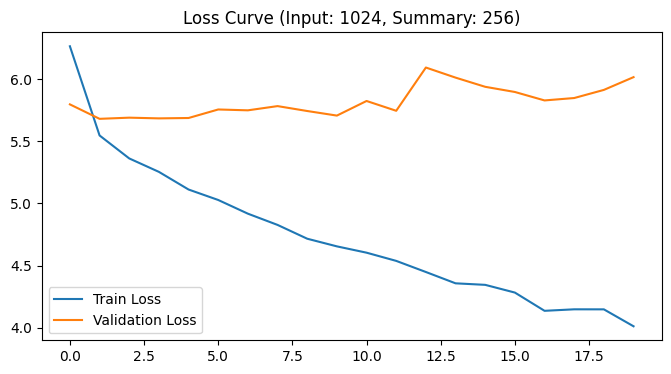

BLEU Score: 0.0153
Accuracy: 0.0968

===== Testing with Main Text: 2048, Summary Text: 128 =====
Input length: 2048, Summary length: 128, Epochs: 20, Batch size: 32
Epoch 1/20: Train Loss: 5.5832, Val Loss: 5.0390
Epoch 2/20: Train Loss: 4.8098, Val Loss: 5.0237
Epoch 3/20: Train Loss: 4.6304, Val Loss: 5.0168
Epoch 4/20: Train Loss: 4.5094, Val Loss: 4.9607
Epoch 5/20: Train Loss: 4.3507, Val Loss: 5.0371
Epoch 6/20: Train Loss: 4.2574, Val Loss: 5.0422
Epoch 7/20: Train Loss: 4.1491, Val Loss: 5.2930
Epoch 8/20: Train Loss: 4.0499, Val Loss: 5.0912
Epoch 9/20: Train Loss: 3.9557, Val Loss: 5.3017
Epoch 10/20: Train Loss: 3.8334, Val Loss: 5.2003
Epoch 11/20: Train Loss: 3.7893, Val Loss: 5.2486
Epoch 12/20: Train Loss: 3.8227, Val Loss: 5.1283
Epoch 13/20: Train Loss: 3.5273, Val Loss: 5.3826
Epoch 14/20: Train Loss: 3.5881, Val Loss: 5.3036
Epoch 15/20: Train Loss: 3.3969, Val Loss: 5.3056
Epoch 16/20: Train Loss: 3.3941, Val Loss: 5.2944
Epoch 17/20: Train Loss: 3.3550, Val Loss: 5

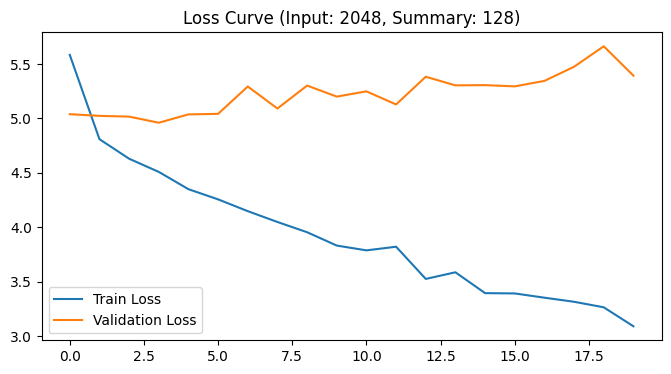

BLEU Score: 0.0388
Accuracy: 0.1609

===== Testing with Main Text: 2048, Summary Text: 256 =====
Input length: 2048, Summary length: 256, Epochs: 20, Batch size: 32
Epoch 1/20: Train Loss: 6.2695, Val Loss: 5.7943
Epoch 2/20: Train Loss: 5.5369, Val Loss: 5.7028
Epoch 3/20: Train Loss: 5.3718, Val Loss: 5.7059
Epoch 4/20: Train Loss: 5.2333, Val Loss: 5.7286
Epoch 5/20: Train Loss: 5.1251, Val Loss: 5.7606
Epoch 6/20: Train Loss: 5.0303, Val Loss: 5.7662
Epoch 7/20: Train Loss: 4.9247, Val Loss: 5.8019
Epoch 8/20: Train Loss: 4.8232, Val Loss: 5.7147
Epoch 9/20: Train Loss: 4.7708, Val Loss: 5.7240
Epoch 10/20: Train Loss: 4.6974, Val Loss: 5.8199
Epoch 11/20: Train Loss: 4.6007, Val Loss: 6.3662
Epoch 12/20: Train Loss: 4.4859, Val Loss: 5.9218
Epoch 13/20: Train Loss: 4.4308, Val Loss: 6.5390
Epoch 14/20: Train Loss: 4.3712, Val Loss: 6.7316
Epoch 15/20: Train Loss: 4.3137, Val Loss: 6.1249
Epoch 16/20: Train Loss: 4.2185, Val Loss: 7.1416
Epoch 17/20: Train Loss: 4.1391, Val Loss: 7

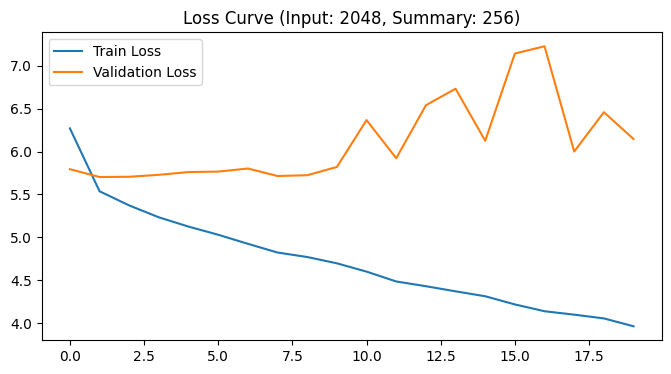

BLEU Score: 0.0398
Accuracy: 0.0953

===== Summary of different Main Text and Summary Text lengths: =====
Main Text: 1024, Summary Text: 128 -> BLEU Score: 0.0352, Accuracy: 0.1267
Main Text: 1024, Summary Text: 256 -> BLEU Score: 0.0153, Accuracy: 0.0968
Main Text: 2048, Summary Text: 128 -> BLEU Score: 0.0388, Accuracy: 0.1609
Main Text: 2048, Summary Text: 256 -> BLEU Score: 0.0398, Accuracy: 0.0953


In [34]:
# Looping through the combinations of input sequence lengths (main text and summary text)
def test_combinations():
    configs = [(1024, 128), (1024, 256), (2048, 128), (2048, 256)]
    results = {}
    for input_len, summary_len in configs:
        print(f"\n===== Testing with Main Text: {input_len}, Summary Text: {summary_len} =====")
        bleu, acc = train_sequence(input_len, summary_len, epochs=20, batch_size=32)
        results[(input_len, summary_len)] = (bleu, acc)
    print("\n===== Summary of different Main Text and Summary Text lengths: =====")
    for (inp, summ), (bleu, acc) in results.items():
        print(f"Main Text: {inp}, Summary Text: {summ} -> BLEU Score: {bleu:.4f}, Accuracy: {acc:.4f}")


test_combinations()

Overall, the highest BLEU score was when the main text was length 2048. From the above results, the best combination was main text of length 2048 and summary text of length 128. The worst combination was when the main text was of length 1024 and summary text length 256. In short, increasing the summary text length only improved the BLEU score if the main text length was also increased.

In terms of accuracy, increasing the summary text length decreased the accuracy, regardless of whether or not the main text length was also increased.

#### 4) Trying different hyperparameters.

For this part, I will alter the following hyperparameters:
* embedding_dim: 128, 256, 300
* hidden_dim: 256, 512
* dropout: 0.2, 0.3, 0.4
* learning rate: 1e-3, 1e-4
* batch size: 32, 64

In [38]:
# Train the model with different hyperparameter configurations.
def hyperparameter_tuning():
    hyperparameters = [
        {"embedding_dim": 256, "hidden_dim": 512, "dropout": 0.2, "lr": 1e-3, "batch_size": 32},
        {"embedding_dim": 300, "hidden_dim": 512, "dropout": 0.3, "lr": 1e-4, "batch_size": 64},
        {"embedding_dim": 256, "hidden_dim": 256, "dropout": 0.4, "lr": 1e-3, "batch_size": 32},
        {"embedding_dim": 128, "hidden_dim": 256, "dropout": 0.2, "lr": 1e-4, "batch_size": 64}
    ]

    for idx, config in enumerate(hyperparameters):
        print(f"\n--- Testing Configuration {idx+1}/{len(hyperparameters)} ---")
        print(f"Config: {config}")
        bleu, acc = train_sequence(
            input_len=1024,
            summary_len=128,
            epochs=20,
            batch_size=config["batch_size"],
            embedding_dim=config["embedding_dim"],
            hidden_dim=config["hidden_dim"],
            dropout=config["dropout"],
            lr=config["lr"]
        )


--- Testing Configuration 1/4 ---
Config: {'embedding_dim': 256, 'hidden_dim': 512, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32}
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 32
Epoch 1/20: Train Loss: 5.6422, Val Loss: 5.0925
Epoch 2/20: Train Loss: 4.8120, Val Loss: 5.0143
Epoch 3/20: Train Loss: 4.5869, Val Loss: 5.0449
Epoch 4/20: Train Loss: 4.5015, Val Loss: 5.0665
Epoch 5/20: Train Loss: 4.3781, Val Loss: 5.0245
Epoch 6/20: Train Loss: 4.2556, Val Loss: 5.1048
Epoch 7/20: Train Loss: 4.1401, Val Loss: 5.1199
Epoch 8/20: Train Loss: 4.0518, Val Loss: 5.1579
Epoch 9/20: Train Loss: 4.0085, Val Loss: 5.2029
Epoch 10/20: Train Loss: 3.8458, Val Loss: 6.0478
Epoch 11/20: Train Loss: 3.7798, Val Loss: 5.1666
Epoch 12/20: Train Loss: 3.7066, Val Loss: 5.2557
Epoch 13/20: Train Loss: 3.6154, Val Loss: 5.2719
Epoch 14/20: Train Loss: 3.5237, Val Loss: 5.9952
Epoch 15/20: Train Loss: 3.4890, Val Loss: 5.1988
Epoch 16/20: Train Loss: 3.3239, Val Loss: 5.3569
Epoch 17/

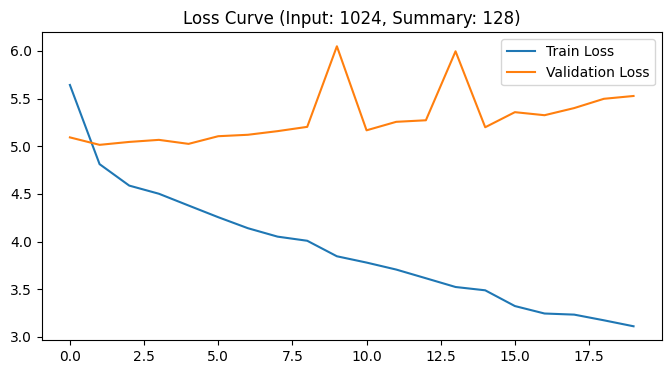

BLEU Score: 0.0292
Accuracy: 0.1448

--- Testing Configuration 2/4 ---
Config: {'embedding_dim': 300, 'hidden_dim': 512, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 64}
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 64
Epoch 1/20: Train Loss: 7.3580, Val Loss: 7.2775
Epoch 2/20: Train Loss: 7.1681, Val Loss: 6.7894
Epoch 3/20: Train Loss: 6.3858, Val Loss: 5.5969
Epoch 4/20: Train Loss: 5.3081, Val Loss: 5.2348
Epoch 5/20: Train Loss: 5.0516, Val Loss: 5.1533
Epoch 6/20: Train Loss: 4.9740, Val Loss: 5.1121
Epoch 7/20: Train Loss: 4.9314, Val Loss: 5.0731
Epoch 8/20: Train Loss: 4.8941, Val Loss: 5.0557
Epoch 9/20: Train Loss: 4.8581, Val Loss: 5.0370
Epoch 10/20: Train Loss: 4.8212, Val Loss: 5.0348
Epoch 11/20: Train Loss: 4.8115, Val Loss: 5.0222
Epoch 12/20: Train Loss: 4.7717, Val Loss: 5.0175
Epoch 13/20: Train Loss: 4.7588, Val Loss: 5.0072
Epoch 14/20: Train Loss: 4.7333, Val Loss: 5.0072
Epoch 15/20: Train Loss: 4.7209, Val Loss: 5.0006
Epoch 16/20: Train Los

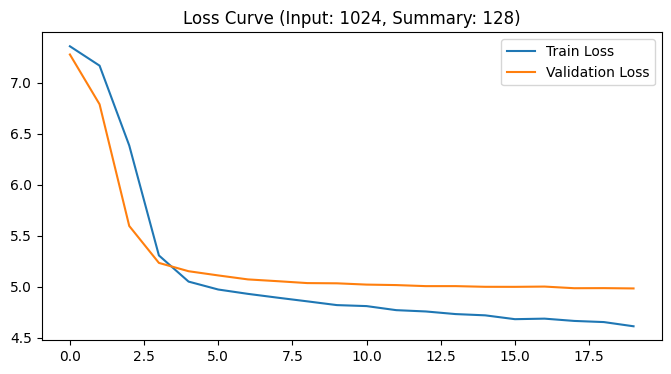

BLEU Score: 0.0235
Accuracy: 0.1709

--- Testing Configuration 3/4 ---
Config: {'embedding_dim': 256, 'hidden_dim': 256, 'dropout': 0.4, 'lr': 0.001, 'batch_size': 32}
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 32
Epoch 1/20: Train Loss: 6.0311, Val Loss: 5.1377
Epoch 2/20: Train Loss: 4.8978, Val Loss: 5.0360
Epoch 3/20: Train Loss: 4.7293, Val Loss: 5.0186
Epoch 4/20: Train Loss: 4.6346, Val Loss: 5.0012
Epoch 5/20: Train Loss: 4.5609, Val Loss: 5.0126
Epoch 6/20: Train Loss: 4.4662, Val Loss: 4.9805
Epoch 7/20: Train Loss: 4.3844, Val Loss: 5.1065
Epoch 8/20: Train Loss: 4.3268, Val Loss: 5.0142
Epoch 9/20: Train Loss: 4.2500, Val Loss: 5.0483
Epoch 10/20: Train Loss: 4.1774, Val Loss: 5.1857
Epoch 11/20: Train Loss: 4.1079, Val Loss: 5.0760
Epoch 12/20: Train Loss: 4.1007, Val Loss: 5.1860
Epoch 13/20: Train Loss: 3.9817, Val Loss: 5.3238
Epoch 14/20: Train Loss: 3.9567, Val Loss: 5.2362
Epoch 15/20: Train Loss: 3.9703, Val Loss: 5.1593
Epoch 16/20: Train Loss

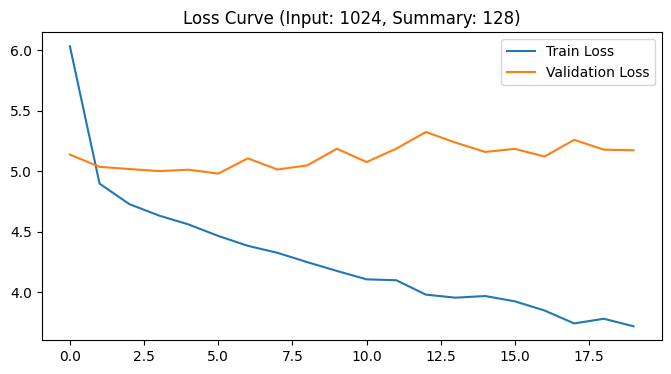

BLEU Score: 0.0260
Accuracy: 0.1596

--- Testing Configuration 4/4 ---
Config: {'embedding_dim': 128, 'hidden_dim': 256, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 64}
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 64
Epoch 1/20: Train Loss: 7.3781, Val Loss: 7.3540
Epoch 2/20: Train Loss: 7.3365, Val Loss: 7.2682
Epoch 3/20: Train Loss: 7.2344, Val Loss: 7.0097
Epoch 4/20: Train Loss: 6.9187, Val Loss: 6.3927
Epoch 5/20: Train Loss: 6.1611, Val Loss: 5.6996
Epoch 6/20: Train Loss: 5.5045, Val Loss: 5.3460
Epoch 7/20: Train Loss: 5.2261, Val Loss: 5.2213
Epoch 8/20: Train Loss: 5.1124, Val Loss: 5.1726
Epoch 9/20: Train Loss: 5.0608, Val Loss: 5.1408
Epoch 10/20: Train Loss: 5.0153, Val Loss: 5.1077
Epoch 11/20: Train Loss: 4.9970, Val Loss: 5.0881
Epoch 12/20: Train Loss: 4.9632, Val Loss: 5.0738
Epoch 13/20: Train Loss: 4.9490, Val Loss: 5.0626
Epoch 14/20: Train Loss: 4.9316, Val Loss: 5.0474
Epoch 15/20: Train Loss: 4.9140, Val Loss: 5.0367
Epoch 16/20: Train Los

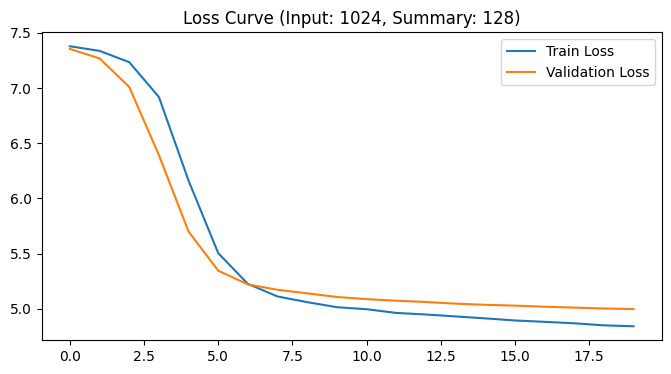

BLEU Score: 0.0000
Accuracy: 0.1652


In [39]:
hyperparameter_tuning()

The highest accuracy achieved here is 0.1709 (BLEU Score: 0.0235) with the following configuration:
* {'embedding_dim': 300, 'hidden_dim': 512, 'dropout': 0.3, 'lr': 0.0001, 'batch_size': 64}.

The highest BLEU score was 0.0292 (Accuracy: 0.1448) with the following configuration:
* {'embedding_dim': 256, 'hidden_dim': 512, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32}
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 32